# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



## Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



## Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**Answer: 17** Marketing Campaigns

## Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Exploratory Data Analysis

Verifying **age** value options distribution

In [159]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

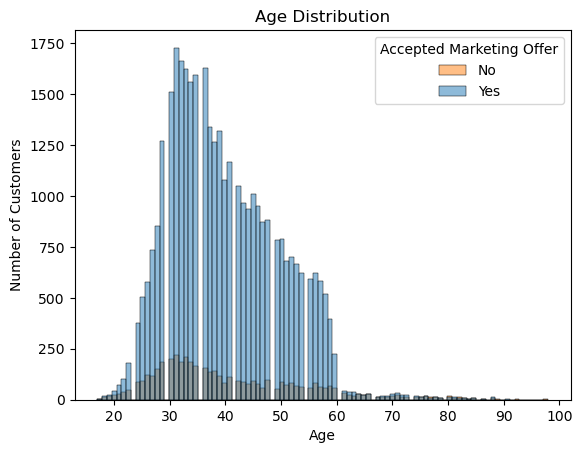

In [304]:
fig = sns.histplot(df, x='age', hue='y')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['No','Yes'])
fig.set_title('Age Distribution')

Reviewing **job type** value options distribution

In [191]:
df['job'].value_counts(normalize=True)

job
admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Job Type Distribution')

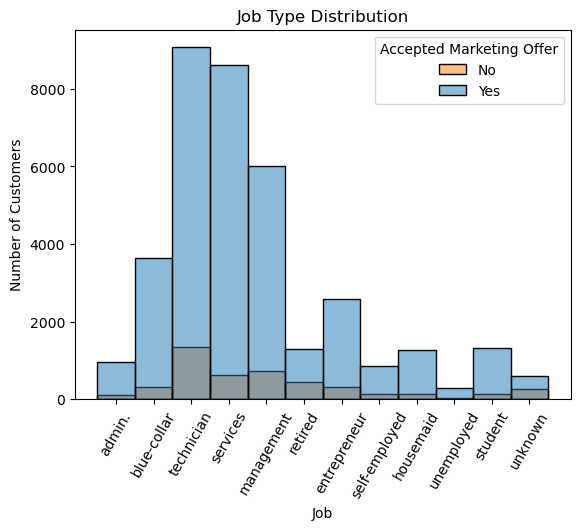

In [303]:
fig = sns.histplot(df, x='job', hue='y')
fig.set_xlabel('Job')
fig.set_ylabel('Number of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['No','Yes'])
fig.set_xticklabels(labels=df['job'].value_counts().index.tolist(), rotation=60, )
fig.set_title('Job Type Distribution')

Reviewing **marital status** value options distribution

In [6]:
df['marital'].value_counts(normalize=True)

marital
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Marital Status Distribution')

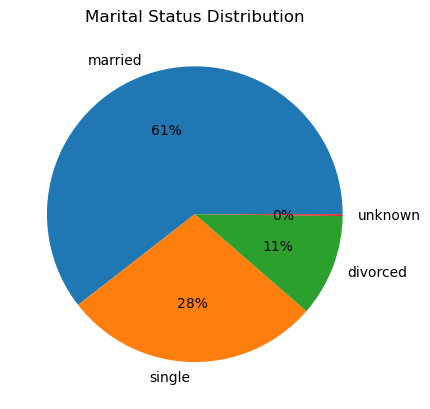

In [214]:
plt.pie(df['marital'].value_counts(), labels=df['marital'].value_counts().index.tolist(),autopct='%1.0f%%')
plt.title('Marital Status Distribution')

Reviewing **education level** value options distribution

In [7]:
df['education'].value_counts(normalize=True)

education
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Educations Level Distribution')

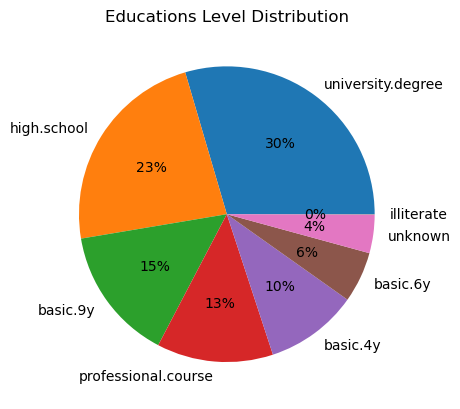

In [278]:
plt.pie(df['education'].value_counts(), labels=df['education'].value_counts().index.tolist(),autopct='%1.0f%%')
plt.title('Educations Level Distribution')

Reviewing **defaulted on a loan** value options distribution

In [257]:
df['default'].value_counts(normalize=True)

default
no         0.791201
unknown    0.208726
yes        0.000073
Name: proportion, dtype: float64

Text(0.5, 1.02, 'Job Type Value Options Distribution')

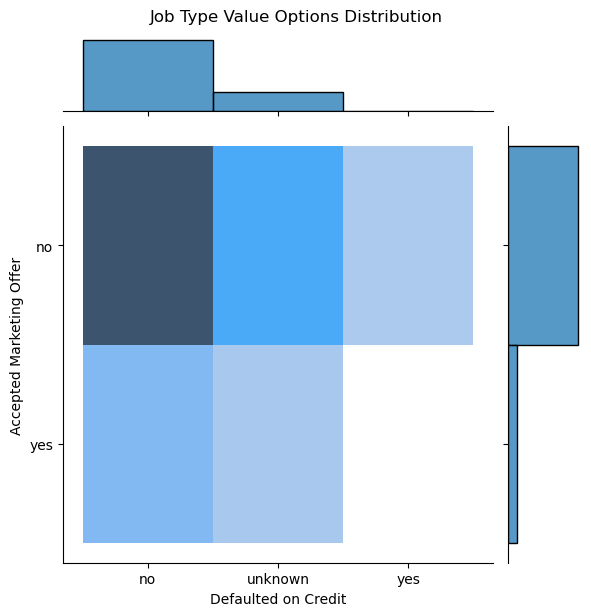

In [263]:
fig = sns.jointplot(df[['default','y']], x='default', y='y', kind='hist')
fig.set_axis_labels('Defaulted on Credit','Accepted Marketing Offer')
plt.suptitle('Job Type Value Options Distribution', y=1.02)

Reviewing **house loan** value options distribution

In [258]:
df['housing'].value_counts(normalize=True).sort_index()

housing
no         0.452122
unknown    0.024036
yes        0.523842
Name: proportion, dtype: float64

Text(0.5, 1.02, 'House Loan Value Options Distribution')

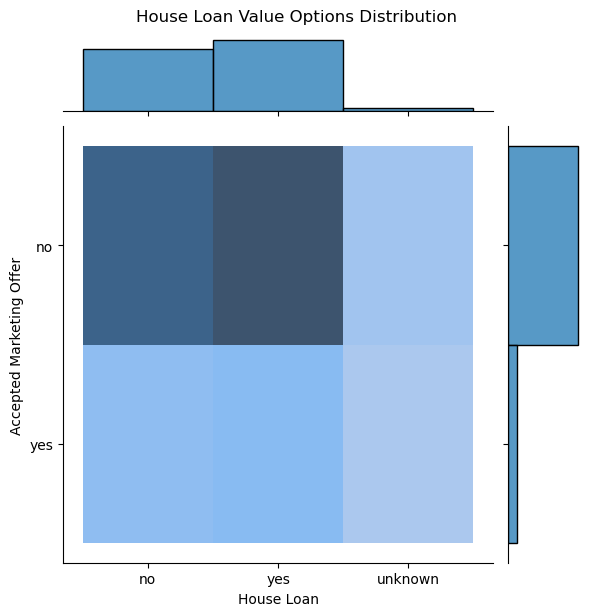

In [262]:
fig = sns.jointplot(df[['housing','y']], x='housing', y='y', kind='hist')
fig.set_axis_labels('House Loan','Accepted Marketing Offer')
plt.suptitle('House Loan Value Options Distribution', y=1.02)

Reviewing **personal loan** value options distribution

In [10]:
df['loan'].value_counts(normalize=True)

loan
no         0.824269
yes        0.151695
unknown    0.024036
Name: proportion, dtype: float64

Text(0.5, 1.02, 'Personal Loan Value Options Distribution')

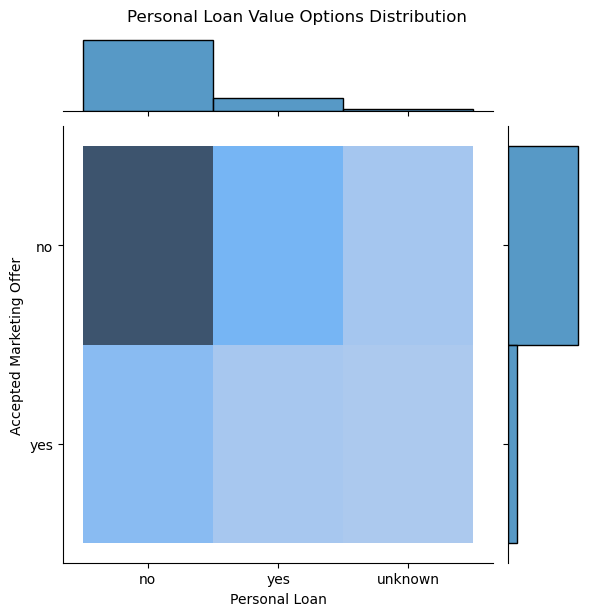

In [261]:
fig = sns.jointplot(df[['loan','y']], x='loan', y='y', kind='hist')
fig.set_axis_labels('Personal Loan','Accepted Marketing Offer')
plt.suptitle('Personal Loan Value Options Distribution', y=1.02)

Reviewing **type of contact** value options distribution

In [11]:
df['contact'].value_counts(normalize=True)

contact
cellular     0.634748
telephone    0.365252
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Type of Contact and Marketing Offer Acceptance Distribution')

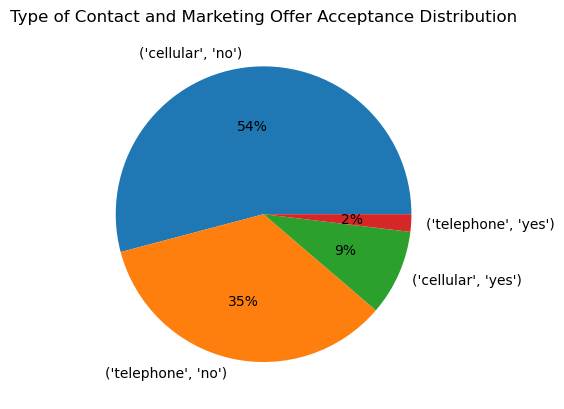

In [282]:
plt.pie(df[['contact','y']].value_counts(), labels=df[['contact','y']].value_counts().index.tolist(),autopct='%1.0f%%')
plt.title('Type of Contact and Marketing Offer Acceptance Distribution')

Reviewing **month** value options distribution

In [12]:
df[['month']].value_counts(normalize=True)

month
may      0.334296
jul      0.174177
aug      0.149995
jun      0.129115
nov      0.099568
apr      0.063902
oct      0.017432
sep      0.013839
mar      0.013256
dec      0.004419
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Month Distribution')

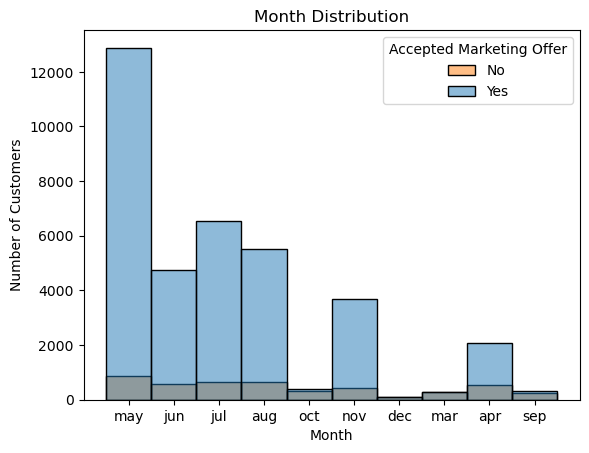

In [302]:
fig = sns.histplot(df, x='month', hue='y')
fig.set_xlabel('Month')
fig.set_ylabel('Number of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['No','Yes'])
fig.set_title('Month Distribution')

Reviewing **day of the week** value options distribution

In [287]:
df['day_of_week'].value_counts(normalize=True).sort_index()

day_of_week
fri    0.190031
mon    0.206711
thu    0.209357
tue    0.196416
wed    0.197485
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Day of the Week Distribution')

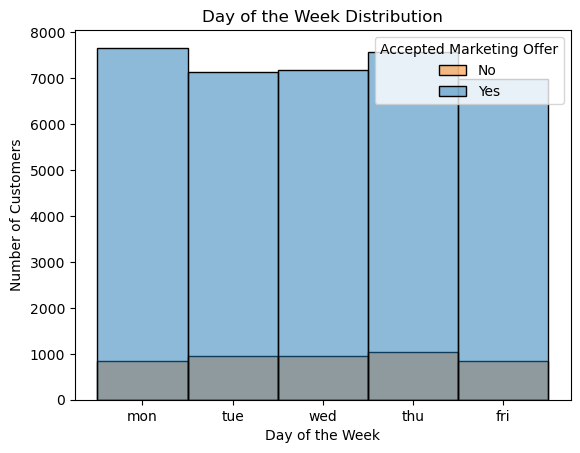

In [301]:
fig = sns.histplot(df, x='day_of_week', hue='y')
fig.set_xlabel('Day of the Week')
fig.set_ylabel('Number of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['No','Yes'])
fig.set_title('Day of the Week Distribution')

Reviewing **campaign contacts** value options distribution

In [14]:
df['campaign'].value_counts(normalize=True)

campaign
1     0.428329
2     0.256628
3     0.129674
4     0.064363
5     0.038822
6     0.023769
7     0.015271
8     0.009712
9     0.006871
10    0.005463
11    0.004297
12    0.003035
13    0.002234
14    0.001675
17    0.001408
16    0.001238
15    0.001238
18    0.000801
20    0.000728
19    0.000631
21    0.000583
22    0.000413
23    0.000388
24    0.000364
27    0.000267
29    0.000243
28    0.000194
26    0.000194
25    0.000194
31    0.000170
30    0.000170
35    0.000121
32    0.000097
33    0.000097
34    0.000073
42    0.000049
40    0.000049
43    0.000049
56    0.000024
39    0.000024
41    0.000024
37    0.000024
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Number of Contacts during Campaign Distribution')

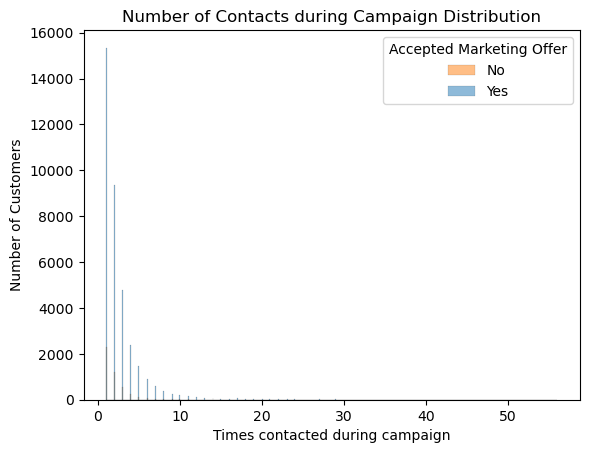

In [300]:
fig = sns.histplot(df, x='campaign', hue='y')
fig.set_xlabel('Times contacted during campaign')
fig.set_ylabel('Number of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['No','Yes'])
fig.set_title('Number of Contacts during Campaign Distribution')

Reviewing **number of days since last contact** distribution

In [15]:
df['pdays'].value_counts(normalize=True)

pdays
999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Number of Days since Last Contact Distribution')

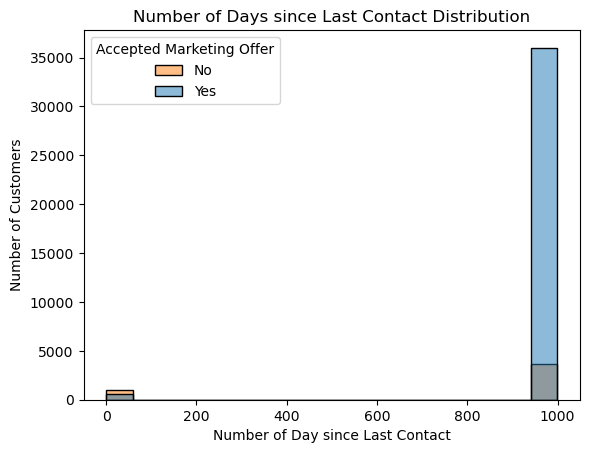

In [299]:
fig = sns.histplot(df, x='pdays', hue='y')
fig.set_xlabel('Number of Day since Last Contact')
fig.set_ylabel('Number of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['No','Yes'])
fig.set_title('Number of Days since Last Contact Distribution')

Reviewing **number of previous contacts** value options distribution

In [16]:
df['previous'].value_counts(normalize=True)

previous
0    0.863431
1    0.110736
2    0.018306
3    0.005244
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Number of Previous Contacts Distribution')

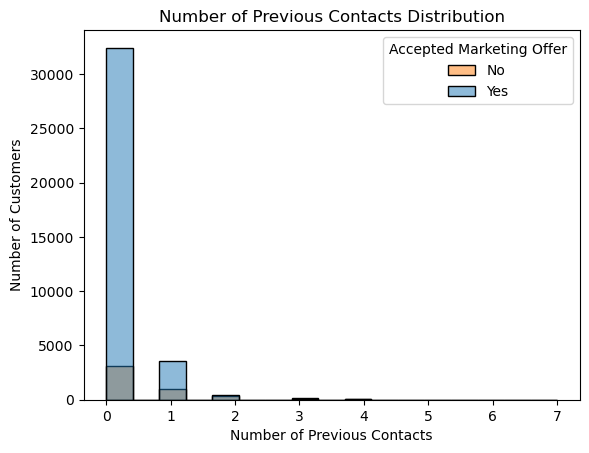

In [298]:
fig = sns.histplot(df, x='previous', hue='y')
fig.set_xlabel('Number of Previous Contacts')
fig.set_ylabel('Number of Customers')
fig.legend(title='Accepted Marketing Offer',labels=['No','Yes'])
fig.set_title('Number of Previous Contacts Distribution')

Reviewing **outcome from previous campaign** value options distribution

In [17]:
df[['poutcome']].value_counts(normalize=True).sort_values(ascending=False)

poutcome   
nonexistent    0.863431
failure        0.103234
success        0.033335
Name: proportion, dtype: float64

Text(0.5, 1.02, 'Previous Campaign Outcome Value Options Distribution')

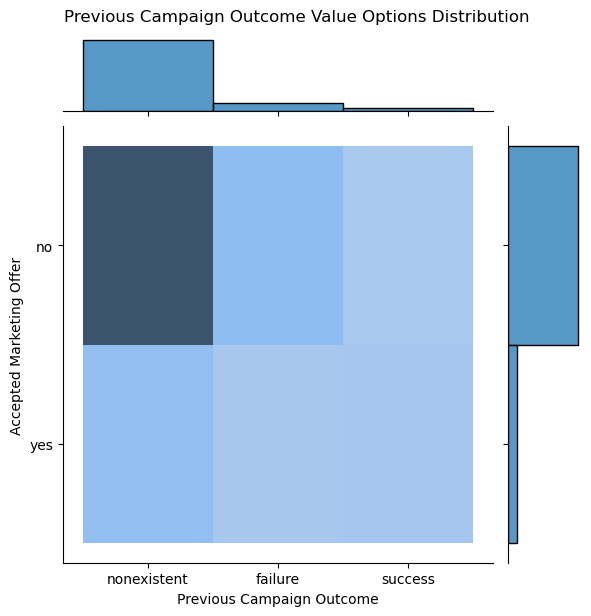

In [305]:
fig = sns.jointplot(df[['poutcome','y']], x='poutcome', y='y', kind='hist')
fig.set_axis_labels('Previous Campaign Outcome','Accepted Marketing Offer')
plt.suptitle('Previous Campaign Outcome Value Options Distribution', y=1.02)

### Initial Observations:
### Customer Data
* **Age** can be reduced to three categories given its distribution (M=40 S=10): "Under 30", "30-50", "Over 50"
* **Job** category is somewhat vague and there seems to be a weak correlation between the value options to be bundled into broader categories hence this feature could be initially ignored
* **Marital Status** can be reduced to just two categories given its even distribution after aggregation as: "Single" and "Not Single"
* **Education** feature options may be overlapping so those could be simplified to just indicate if the person has professional/university education or not
* **Default** values distribution is very skewed where most customers have not defaulted and the rest of the information is uknown hence this feature should be ignored
* **Housing** feature should be used as is after filling in the unknown values
* **Loan** values distribution is also very skewed but it should be included with some normalization after filling in the unknown values
### Campaign Data
* **Contact** the feature could be used as is but some assumptions me be needed to make meaningful recommendations regarding this feature
* **Month** feature could be simplified by quarters in order to reduce the number of additional features if data encoding is necessary
* **Day of Week** distribution is acceptable and could be used as is for initial modeling but preliminary analysis shows each day has similar success rate making it somewhat irrelevant
* **Duration** will be ignored per recommendations
### Other Attributes
* **Campaign** value options are too broad and can be reduced to a binary option: "1" and "2 or more"
* **P-Days** distribution is extremely skewed where most customers (96.3%) have not been previosly contacted therefore it should be ignored
* **Previous** distribution is also very skewed (86%) towards customers without previous contact but it could be simplified as binary: "Not contacted" or "Contacted"
* **POutcome** distribution is very skewed where most results (86%) are nonexistent hence this feature should be ignored
### Social & Economic Attributes
* **Employmnet Variation Rate**
* **Consumer Price Index**
* **Consumer Confidence Index**
* **Euribor 3 Month Rate**
* **Number of Employees**

These features are considered macro-economic factors linked to a time period and should be reflecting the collective behavior of consumers or companies hence it may be difficult to establish a correlation with the individual customer or the campaign specifics for that individual. Given these are quarterly numbers, those could be correlated to the month when the contact was made but in such case that would be irrespective of the individual and could be analyzed perhaps as a time series related to the overall campaign's schedule. That may be beyond the scope of the business objective for this exercise therefore these features may be ignored.

## Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

----

### Business Objective
**Identify the best Machine Learning Classification model that can be used to apply the CRISP-DM methodology to determine the factors that drive the success of tele-marketing campaigns for a Banking Institution**

The evaluation of the best model will be based on the data available from the Bank's previous marketing campaigns, which highlights the acceptance or rejection of the product offered and includes of personal characteristics of the customer as well as a few specifics about how the product was offered to that individual

----

## Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [19]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

Creating engineered data frame

In [20]:
df_eng = df.drop(columns=['job','default','day_of_week','duration','pdays','poutcome',\
                            'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])

Aggregating **Age** category values

In [21]:
df_eng['age'] = df.apply(lambda x: 'Undr 30' if (x['age'] < 30) else '40 - 50' if (x['age'] <= 50) else 'Over 50', axis=1)
df_eng['age'].value_counts(normalize=True)

age
40 - 50    0.688040
Over 50    0.174323
Undr 30    0.137637
Name: proportion, dtype: float64

Aggregating and encoding **Marital** category values

In [22]:
df_eng['marital'] = df['marital'].map({'single':0,
                                       'divorced':0,
                                       'married':1})
df_eng['marital'].value_counts(normalize=True)

marital
1.0    0.606403
0.0    0.393597
Name: proportion, dtype: float64

Aggregating and encoding **Education** category values

In [23]:
df_eng['education'] = df['education'].map({'illiterate':0,
                                           'basic.4y':0,
                                           'basic.6y':0,
                                           'basic.9y':0,
                                           'high.school':0,
                                           'professional.course':1,
                                           'university.degree':1})
df_eng['education'].value_counts(normalize=True)

education
0.0    0.558735
1.0    0.441265
Name: proportion, dtype: float64

Encoding **Housing** category values

In [24]:
df_eng['housing'] = df['housing'].map({'no':0,'yes':1})
df_eng['housing'].value_counts(normalize=True)

housing
1.0    0.536743
0.0    0.463257
Name: proportion, dtype: float64

Encoding **Loan** category values

In [25]:
df_eng['loan'] = df['loan'].map({'no':0,'yes':1})
df_eng['loan'].value_counts(normalize=True)

loan
0.0    0.844569
1.0    0.155431
Name: proportion, dtype: float64

Encoding **Contact** category values

In [26]:
df_eng['contact'] = df['contact'].map({'telephone':0,'cellular':1})
df_eng['contact'].value_counts(normalize=True)

contact
1    0.634748
0    0.365252
Name: proportion, dtype: float64

Aggregating **Month** category values

In [27]:
df_eng['month'] = df['month'].map({'ene':'q1','feb':'q1','mar':'q1',
                                   'apr':'q2','may':'q2','jun':'q2',
                                   'jul':'q3','aug':'q3','sep':'q3',
                                   'oct':'q4','nov':'q4','dec':'q4'})
df_eng['month'].value_counts(normalize=True)

month
q2    0.527314
q3    0.338011
q4    0.121419
q1    0.013256
Name: proportion, dtype: float64

Encoding **Campaign** category values

In [28]:
df_eng['campaign'] = df.apply(lambda x: 0 if (x['campaign'] == 1) else 1, axis=1)
df_eng['campaign'].value_counts(normalize=True)

campaign
1    0.571671
0    0.428329
Name: proportion, dtype: float64

Encoding **Previous** category values

In [29]:
df_eng['previous'] = df.apply(lambda x: 1 if (x['previous'] >0) else 0, axis=1)
df_eng['previous'].value_counts(normalize=True)

previous
0    0.863431
1    0.136569
Name: proportion, dtype: float64

Filling in missing data as a result of **'unknown'** values in some categories

In [30]:
df_eng['marital'] = df_eng['marital'].ffill()
df_eng['education'] = df_eng['education'].ffill()
df_eng['housing'] = df_eng['housing'].ffill()
df_eng['loan'] = df_eng['loan'].ffill()
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        41188 non-null  object 
 1   marital    41188 non-null  float64
 2   education  41188 non-null  float64
 3   housing    41188 non-null  float64
 4   loan       41188 non-null  float64
 5   contact    41188 non-null  int64  
 6   month      41188 non-null  object 
 7   campaign   41188 non-null  int64  
 8   previous   41188 non-null  int64  
 9   y          41188 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 3.1+ MB


Encoding **discrete** categories

In [31]:
colTrans = ColumnTransformer([('ohe', OneHotEncoder(), ['age','month'])],
                             remainder='passthrough',
                             verbose_feature_names_out=False)
df_trans = pd.DataFrame(colTrans.fit_transform(df_eng),columns=colTrans.get_feature_names_out())

Resetting columns data type for final data set

In [32]:
df_eng = df_trans.convert_dtypes()
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age_40 - 50  41188 non-null  Int64 
 1   age_Over 50  41188 non-null  Int64 
 2   age_Undr 30  41188 non-null  Int64 
 3   month_q1     41188 non-null  Int64 
 4   month_q2     41188 non-null  Int64 
 5   month_q3     41188 non-null  Int64 
 6   month_q4     41188 non-null  Int64 
 7   marital      41188 non-null  Int64 
 8   education    41188 non-null  Int64 
 9   housing      41188 non-null  Int64 
 10  loan         41188 non-null  Int64 
 11  contact      41188 non-null  Int64 
 12  campaign     41188 non-null  Int64 
 13  previous     41188 non-null  Int64 
 14  y            41188 non-null  string
dtypes: Int64(14), string(1)
memory usage: 5.3 MB


## Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [33]:
from sklearn.model_selection import train_test_split

Separating features set and target variable

In [34]:
X = df_eng.drop(columns=['y'])
y = df_eng['y']

Creating Train and Test data sets

**Note:** Given the imbalance in classes for the target variable, the **stratify** options is used

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=142, stratify=y)

## Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [36]:
y.value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: Float64

---

Given the value distribution for the target variable, the baseline performance is **88.73%**

---

## Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [37]:
from sklearn.linear_model import LogisticRegression

### Logistic Regresssion

Instantiating a Logistic Regression model object

In [38]:
logRegMod = LogisticRegression()

Fitting the model witht the train data

In [39]:
%%time
logRegMod.fit(X_train,y_train)

CPU times: user 218 ms, sys: 1.59 ms, total: 219 ms
Wall time: 50.5 ms


LogisticRegression()

## Problem 9: Score the Model

What is the accuracy of your model?

Logistic Regression Test Accuracy

In [40]:
logRegAcc_train = logRegMod.score(X_train,y_train)
logRegAcc_train

0.8877666634294779

Logistic Regression Train Accuracy

In [41]:
logRegAcc_test = logRegMod.score(X_test,y_test)
logRegAcc_test

0.8886083325240361

---

The mean accuracy of the basic Logistic Regression Model is **88.86%**

---

## Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC

### K Nearest Neighbors

Instantiating a K Neighbors Classifier model object

In [43]:
knnClsMod = KNeighborsClassifier()

Fitting the model with the train data

In [44]:
%%time
knnClsMod.fit(X_train,y_train)

CPU times: user 158 ms, sys: 55.9 ms, total: 214 ms
Wall time: 28.4 ms


KNeighborsClassifier()

KNN Train Accuracy

In [45]:
knnClsAcc_train = knnClsMod.score(X_train,y_train)
knnClsAcc_train

0.8890939108478197

KNN Test Accuracy

In [46]:
knnClsAcc_test = knnClsMod.score(X_test,y_test)
knnClsAcc_test

0.8817131203263087

### Decision Tree

Instantiating a Decision Tree model object

In [47]:
decTreMod = DecisionTreeClassifier()

Fitting the model with the train data

In [48]:
%%time
decTreMod.fit(X_train,y_train)

CPU times: user 29.6 ms, sys: 882 µs, total: 30.5 ms
Wall time: 30.4 ms


DecisionTreeClassifier()

Decision Tree Train Accuracy

In [49]:
decTreAcc_train = decTreMod.score(X_train,y_train)
decTreAcc_train

0.8971221391343757

Decision Tree Test Accuracy

In [50]:
decTreAcc_test = decTreMod.score(X_test,y_test)
decTreAcc_test

0.8878314072059823

### Support Vector Machine

Instantiating a Support Vector Machine model object

In [51]:
svmClsMod = SVC()

Fitting the model with the train data

In [52]:
%%time
svmClsMod.fit(X_train,y_train)

CPU times: user 4.17 s, sys: 25.9 ms, total: 4.19 s
Wall time: 4.19 s


SVC()

SVC Train Accuracy

In [53]:
svmClsAcc_train = svmClsMod.score(X_train,y_train)
svmClsAcc_train

0.8904859020426662

In [54]:
svmClsAcc_test = svmClsMod.score(X_test,y_test)
svmClsAcc_test

0.8885112168592794

Comparing the models performance

In [55]:
df_Models = pd.DataFrame({
    'Model':['LogisticRegression','K-NearestNeighbors','DecisionTree','SupportVectorMachine'],
    'Train Time':[0.214,0.283,0.029,4.26],
    'Train Accuracy':[logRegAcc_train,knnClsAcc_train,decTreAcc_train,svmClsAcc_train],
    'Test Accuracy':[logRegAcc_test,knnClsAcc_test,decTreAcc_test,svmClsAcc_test]})\
    .set_index('Model').sort_values(by=['Test Accuracy','Train Time'],ascending=False)
df_Models

,Train Time,Train Accuracy,Test Accuracy
Model,,,
LogisticRegression,0.214,0.887767,0.888608
SupportVectorMachine,4.260,0.890486,0.888511
DecisionTree,0.029,0.897122,0.887831
K-NearestNeighbors,0.283,0.889094,0.881713


---

### Observations

All models with default values have similar test accuracy, which are also very close to the accuracy of the **Baseline** model. The **SVM** model takes significantly more time to train than the rest, being **Decision Tree** a lot faster than the others

---

## Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

---

### Improvement recommendations

* There has been a significant reduction in features and the fitting times are quite fast already so the current engineered data set will be used for the next phase of hyperparameter tunning
* Ultimately the business objective is to determine the best model to use for classification of this particular data hence the priority is to evaluate every model's performance with the same data set
* More importantly, accuracy may not be the best metric to use in this case and since there are no serious implications for the customer or the company with false positives or false negatives; given the imbalanced classes for the target variable, it would be best to use F1 scoring

---

Creating f1 scorer for use with target variable labels

In [57]:
f1_scorer = make_scorer(f1_score, greater_is_better=True,  pos_label='yes')

### Logistic Regression Tuning

Configuring search paramaters for the grid search estimator

In [58]:
logRegParams = {'penalty':['l2'],
                'fit_intercept':[False,True],
                'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']}

Instantiating the grid search object

**Note:** Due to warning errors using f1 scoring, accuracy was used for instead

In [59]:
logRegGrd =  GridSearchCV(estimator=logRegMod,
                          param_grid=logRegParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

Fitting the search with the trainnig data

In [60]:
%%time
logRegGrd.fit(X_train,y_train)

CPU times: user 37.9 s, sys: 1min 2s, total: 1min 40s
Wall time: 12.9 s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [False, True], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             return_train_score=True,
             scoring=make_scorer(f1_score, pos_label=yes))

Best model **parameters**

In [61]:
logRegGrd.best_params_

{'fit_intercept': False, 'penalty': 'l2', 'solver': 'lbfgs'}

Best model **probabilities**

In [62]:
logRegProbs = logRegGrd.best_estimator_.predict_proba(X_test)[:,1]

Best model **predictions**

In [63]:
logRegPreds = logRegGrd.best_estimator_.predict(X_test)

Best model **f1 score**

In [64]:
logRegF1 = logRegGrd.best_score_
logRegF1

0.05134973490108541

Best model **accuracy**

In [65]:
logRegAcc = accuracy_score(y_test,logRegPreds)
logRegAcc

0.8884141011945227

Best model **precision**

In [66]:
logRegPre = precision_score(y_test,logRegPreds, pos_label='yes')
logRegPre

0.6170212765957447

Best model **recall**

In [67]:
logRegRec = recall_score(y_test, logRegPreds, pos_label='yes')
logRegRec

0.025

Best model **auc**

In [68]:
logRegAuc = roc_auc_score(y_test, logRegProbs)
logRegAuc

0.7084347273118393

**Logistic Regression Confusion Matrix**

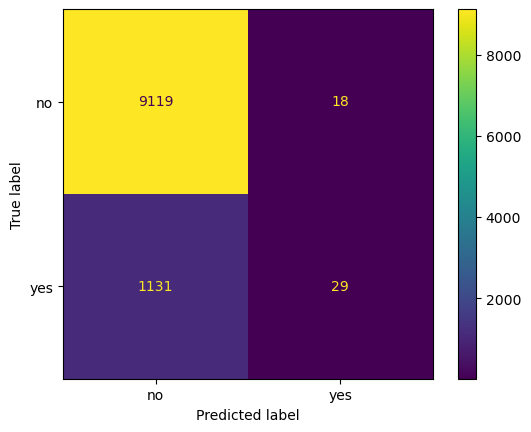

In [69]:
logRegCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,logRegPreds),display_labels=['no','yes'])
logRegCnfMtx.plot()

**Logistic Regression ROC AUC**

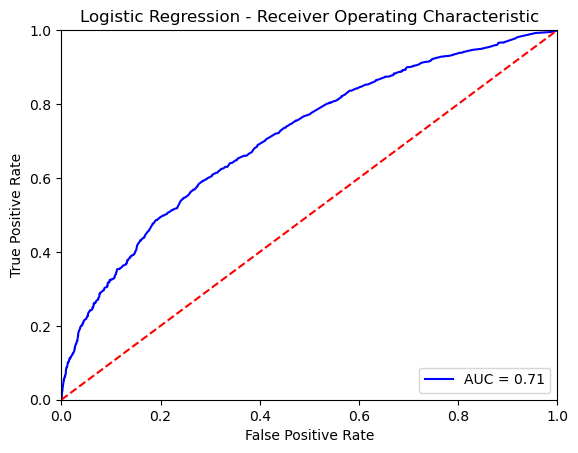

In [70]:
fpr, tpr, threshold = roc_curve(y_test,logRegProbs,pos_label='yes')
roc_auc = auc(fpr, tpr)

plt.title('Logistic Regression - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K Nearest Neighbors Tuning

Configuring search paramaters for the grid search estimator

In [71]:
knnClsParams = {'n_neighbors':[3,5,10,15]}

Instantiating the grid search object

In [72]:
knnClsGrd =  GridSearchCV(estimator=knnClsMod,
                          param_grid=knnClsParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

Fitting the search with the trainnig data

In [73]:
%%time
knnClsGrd.fit(X_train,y_train)

CPU times: user 32.7 s, sys: 31.2 ms, total: 32.7 s
Wall time: 32.3 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 15]},
             return_train_score=True,
             scoring=make_scorer(f1_score, pos_label=yes))

Best model **parameters**

In [74]:
knnClsGrd.best_params_

{'n_neighbors': 5}

Best model **probabilities**

In [75]:
knnClsProbs = knnClsGrd.best_estimator_.predict_proba(X_test)[:,1]

Best model **predictions**

In [76]:
knnClsPreds = knnClsGrd.best_estimator_.predict(X_test)

Best model **f1 score**

In [77]:
knnClsF1 = knnClsGrd.best_score_
knnClsF1

0.1961621448673036

Best model **accuracy**

In [78]:
knnClsAcc = accuracy_score(y_test,knnClsPreds)
knnClsAcc

0.8817131203263087

Best model **precision**

In [79]:
knnClsPre = precision_score(y_test,knnClsPreds,pos_label='yes')
knnClsPre

0.421195652173913

Best model **recall**

In [80]:
knnClsRec = recall_score(y_test,knnClsPreds,pos_label='yes')
knnClsRec

0.1336206896551724

Best model **auc**

In [81]:
knnClsAuc = roc_auc_score(y_test,knnClsProbs)
knnClsAuc

0.6307289327591867

**K Nearest Neighbors Confusion Matrix**

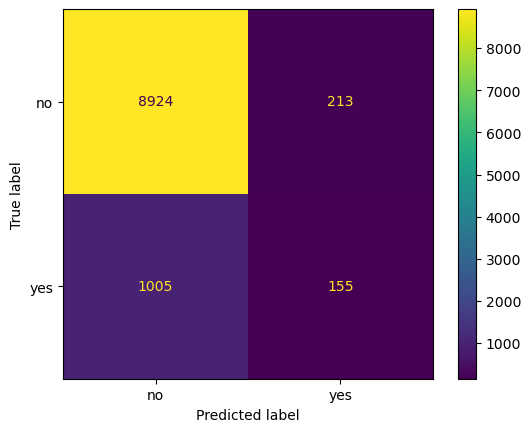

In [82]:
knnClsCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,knnClsPreds),display_labels=['no','yes'])
knnClsCnfMtx.plot()

**K Nearest Neighbors ROC AUC**

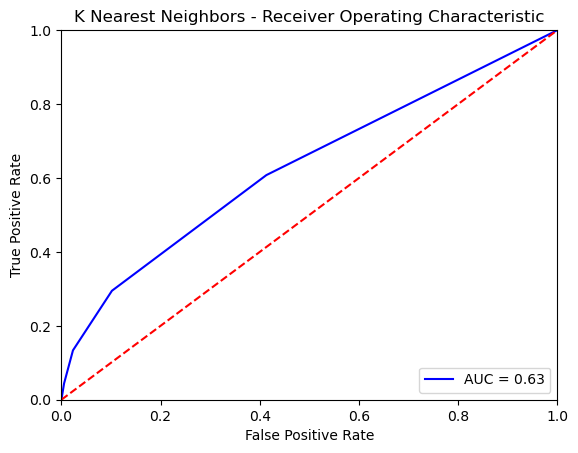

In [83]:
fpr, tpr, threshold = roc_curve(y_test,knnClsProbs,pos_label='yes')
roc_auc = auc(fpr, tpr)

plt.title('K Nearest Neighbors - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree Tuning

Configuring search paramaters for the grid search estimator

In [84]:
decTreParams = {'max_depth':[2,3,5,7,10,15],
                'criterion':['gini','entropy','log_loss'],
                'min_samples_split':[2,4,6,8],
                'min_samples_leaf':[1,2,3,5]}

Instantiating the grid search object

In [85]:
decTreGrd =  GridSearchCV(estimator=decTreMod,
                          param_grid=decTreParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

Fitting the search with the trainnig data

In [86]:
%%time
decTreGrd.fit(X_train,y_train)

CPU times: user 3min 8s, sys: 733 ms, total: 3min 9s
Wall time: 3min 9s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 4, 6, 8]},
             return_train_score=True,
             scoring=make_scorer(f1_score, pos_label=yes))

Best model **parameters**

In [87]:
decTreGrd.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Best model **probabilities**

In [88]:
decTreProbs = decTreGrd.best_estimator_.predict_proba(X_test)[:,1]

Best model **predictions**

In [89]:
decTrePreds = decTreGrd.best_estimator_.predict(X_test)

Best model **f1 score**

In [90]:
decTreF1 = decTreGrd.best_score_
decTreF1

0.19177386071298985

Best model **accuracy**

In [91]:
decTreAcc = accuracy_score(y_test,decTrePreds)
decTreAcc

0.8921044964552782

Best model **precision**

In [92]:
decTrePre = precision_score(y_test,decTrePreds,pos_label='yes')
decTrePre

0.5798045602605864

Best model **recall**

In [93]:
decTreRec = recall_score(y_test,decTrePreds,pos_label='yes')
decTreRec

0.15344827586206897

Best model **auc**

In [94]:
decTreAuc = roc_auc_score(y_test,decTreProbs)
decTreAuc

0.6841834356708043

**Decision Tree Confusion Matrix**

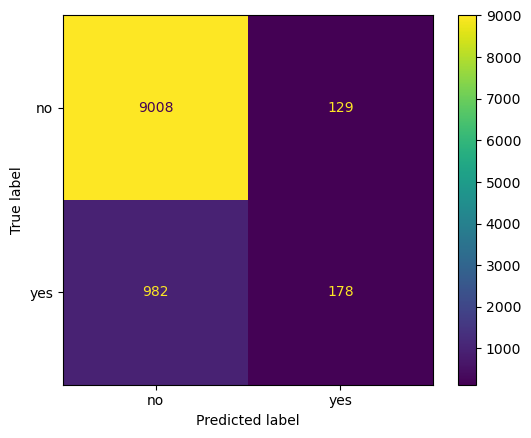

In [95]:
decTreCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,decTrePreds),display_labels=['no','yes'])
decTreCnfMtx.plot()

**Decision Tree ROC AUC**

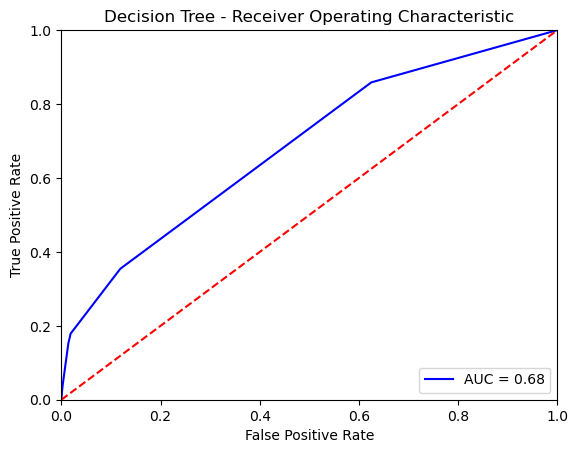

In [96]:
fpr, tpr, threshold = roc_curve(y_test,decTreProbs,pos_label='yes')
roc_auc = auc(fpr, tpr)

plt.title('Decision Tree - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision Tree Plot

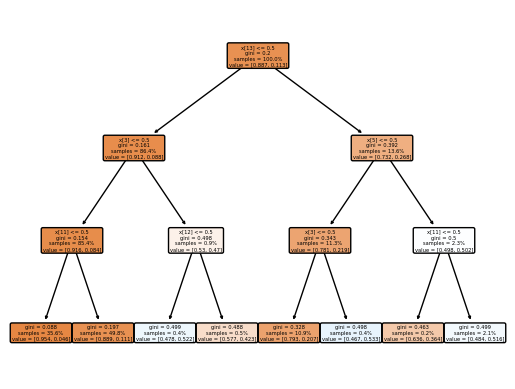

In [97]:
fig = plot_tree(decTreGrd.best_estimator_, filled=True, proportion=True, rounded=True)

### Support Vector Machine Tuning

Configuring search paramaters for the grid search estimator

In [98]:
svmClsParams = {'C':[0.1,1.0,10],
                'kernel':['rbf','linear','poly'],
                'degree':[3],
                'gamma':['scale','auto']}

Instantiating the grid search object

In [99]:
svmClsGrd =  GridSearchCV(estimator=svmClsMod,
                          param_grid=svmClsParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

Fitting the search with the trainnig data

In [100]:
%%time
svmClsGrd.fit(X_train,y_train)

CPU times: user 7min 10s, sys: 1.98 s, total: 7min 12s
Wall time: 7min 13s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10], 'degree': [3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']},
             return_train_score=True,
             scoring=make_scorer(f1_score, pos_label=yes))

Best model **parameters**

In [101]:
svmClsGrd.best_params_

{'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

Best model with probabilities

In [103]:
svmClsMod = SVC(C=10,probability=True).fit(X_train,y_train)

Best model **probabilities**

In [105]:
svmClsProbs = svmClsMod.predict_proba(X_test)[:,1]

Best model **predictions**

In [107]:
svmClsPreds = svmClsGrd.best_estimator_.predict(X_test)

Best model **f1 score**

In [109]:
svmClsF1 = svmClsGrd.best_score_
svmClsF1

0.1650354972887615

Best model **accuracy**

In [112]:
svmClsAcc = accuracy_score(y_test,svmClsPreds)
svmClsAcc

0.8888025638535496

Best model **precision**

In [115]:
svmClsPre = precision_score(y_test,svmClsPreds,pos_label='yes')
svmClsPre

0.5319148936170213

Best model **recall**

In [116]:
svmClsRec = recall_score(y_test,svmClsPreds,pos_label='yes')
svmClsRec

0.10775862068965517

Best model **auc**

In [117]:
svmClsAuc = roc_auc_score(y_test,svmClsProbs)
svmClsAuc

0.5982838817539899

**Support Vector Machine Confusion Matrix**

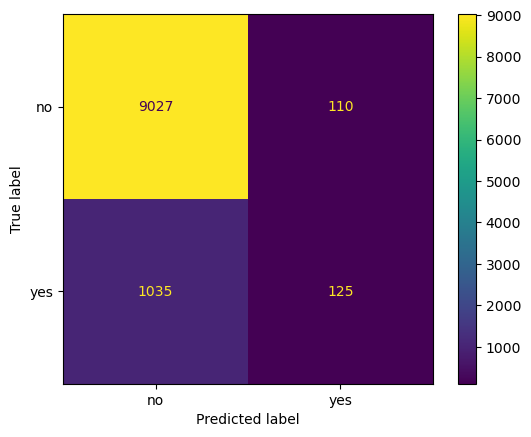

In [118]:
svmClsCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,svmClsPreds),display_labels=['no','yes'])
svmClsCnfMtx.plot()

**Support Vector Machine ROC AUC**

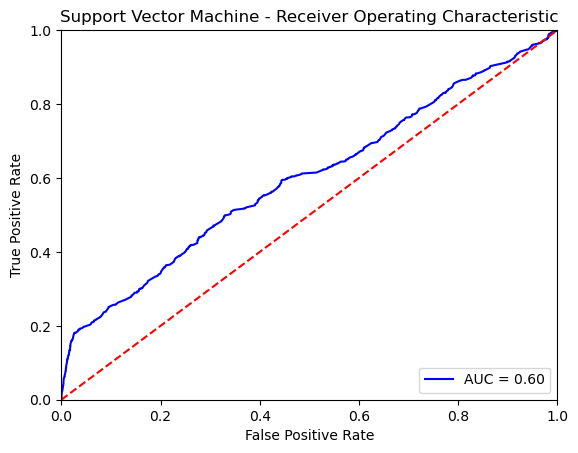

In [119]:
fpr, tpr, threshold = roc_curve(y_test,svmClsProbs,pos_label='yes')
roc_auc = auc(fpr, tpr)

plt.title('Support Vector Machine - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Best Models Performance Comparison

In [126]:
df_Models = pd.DataFrame({
    'Model':['LogisticRegression','K-NearestNeighbors','DecisionTree','SupportVectorMachine'],
    'F1':[logRegF1,knnClsF1,decTreF1,svmClsF1],
    'Accuracy':[logRegAcc,knnClsAcc,decTreAcc,svmClsAcc],
    'Precision':[logRegPre,knnClsPre,decTrePre,svmClsPre],
    'Recall':[logRegRec,knnClsRec,decTreRec,svmClsRec],
    'AUC':[logRegAuc,knnClsAuc,decTreAuc,svmClsAuc]})\
    .set_index('Model').sort_values(by=['F1','Accuracy'],ascending=False)
df_Models

,F1,Accuracy,Precision,Recall,AUC
Model,,,,,
K-NearestNeighbors,0.196162,0.881713,0.421196,0.133621,0.630729
DecisionTree,0.191774,0.892104,0.579805,0.153448,0.684183
SupportVectorMachine,0.165035,0.888803,0.531915,0.107759,0.598284
LogisticRegression,0.051350,0.888414,0.617021,0.025000,0.708435


### Observations

* The F1 scoring is significantly low for all the models which implies a difficulty in balancing Precision and Recall
* That is likely due to the heavily unbalanced classes for the target variable, despite the stratification of the Train/Test split
* It is expected that any effort to balance the data will help improve performance for all the models, perhaps not at the same rate
* The GridSearch on the SVM Classifier had to be limited due to the excesive computing time required

## Conclusions

---

* Based on these results, which target F1 scoring as a measure of adecuacy for the model to classify the tele-marketing data, the recommendation is to use **K Nearest Neighbors** as a first option


* Considering some of the drawbacks of **KNN**, a second best option would be to use a **Decision Tree** model


* Both of these models seem to strike an acceptable balance between performance scoring, simplicity when it comes to configuring hyper-parameters, and similar fitting times that do not appear resource intensive


---

## Recommendations

* Given the challenges with such an unbalanced data set, the main recommendation is to further improve the data engineering process and apply more elaborate techniques to reduce that condition
* Cycle through the tuning process with that new set of data and assess any improvement in performance, which may yield a differnt outcome for the best model to use
* Priority should be put on working with the two best models identified in this initial assessment

## Questions

From the **CRISP-DM** methodology perspective:
* Is there more data available regarding the success of previous campaigns?
* What are the resource allocation to have more computing capacity to fully evaluate **SVM**?
* Is there any intent to evaluate the success of each campaign based on the macro-economic factors (i.e. consumer price index or consumer confidence index?